# Real Estate Image Classification

##1. Business Problem

### 1.1 Description

* **Real Estate Image Classification** is a research paper by Jawadul H. Bappy, Joseph R. Barr, Narayanan Srinivasan, and Amit K. Roy-Chowdhury. 
* Selecting a complimentary picture is a necessary part of advertising a home for sale. Typically, agents manually sort through bulk of images for annotating images accompanied by descriptions (bedroom, bathroom, attic, etc.). This is not a problem until the volume of pictures are small, but there is a point this becomes troublesome.
* This research paper tries to help the real estate agents by labeling the images. 
* The model in the research takes an image as input and gives label as output. The labels include backyard, bathroom, bedroom, frontyard, kitchen and livingRoom. 



###1.2 Source Link

**Research Paper** : https://www.researchgate.net/publication/316494092_Real_Estate_Image_Classification
       
**(OR)**     
https://ieeexplore.ieee.org/document/6968381
         
**Dataset** :  https://drive.google.com/drive/folders/0B54qhIps3nofSHVSNVd5Z0k1SzQ

###1.3 Real world/Business Objectives and Constraints:

* The goal is to label a real estate image. (labels :backyard, bathroom, bedroom, frontyard, kitchen and livingRoom)
* No Latency constraints. It could finish in few seconds.
* Incorrect label of an image impact customer’s experience.

In [ ]:
'''
Problem Statement: Given a real estate image classify it as any one of these, backyard, bathroom, bedroom, frontyard, kitchen and livingRoom. 
'''

'\nProblem Statement: Given a real estate image classify it as any one of these, backyard, bathroom, bedroom, frontyard, kitchen and livingRoom. \n'

###success metric : research paper model should out perform existing models.


## Importing req libraries:

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import cv2

##Exploratory Data Analysis

In [ ]:
!gdown --id 1R5HprLDly8d3cWdDwA7cSKVR7EbvQiiA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1R5HprLDly8d3cWdDwA7cSKVR7EbvQiiA
To: /content/REI-Dataset_.zip
100% 302M/302M [00:01<00:00, 220MB/s]


In [ ]:
!unzip '/content/REI-Dataset_.zip'

Number of Data points/images for each label:
+------+------------+-------+-------+
| Sno. |   label    | count |  %age |
+------+------------+-------+-------+
|  1   | frontyard  |  884  | 15.09 |
|  2   |  bathroom  |  793  | 13.53 |
|  3   |  bedroom   |  1593 | 27.19 |
|  4   |  kitchen   |  992  | 16.93 |
|  5   |  backyard  |  745  | 12.72 |
|  6   | livingRoom |  852  | 14.54 |
+------+------------+-------+-------+


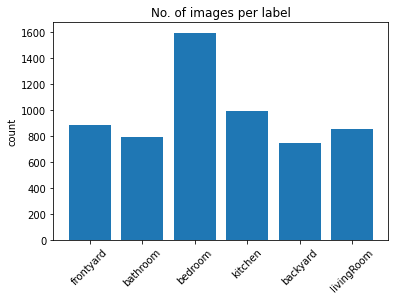

In [ ]:


labels=[]
datapoints_cnt=[]
for (root,dirs,files) in os.walk('/content/REI-Dataset_', topdown=True):

        if(len(files)>0):
          #print(root[root.rfind('/')+1:])
          labels.append(root[root.rfind('/')+1:])
          datapoints_cnt.append(len(files))

percentages = list(map(lambda x : round(x,2),list((np.array(datapoints_cnt)/sum(datapoints_cnt))*100  )))


from prettytable import PrettyTable
  
columns = ["Sno.", "label", "count","%age"]
  
table = PrettyTable()
  
table.add_column(columns[0], list(range(1,len(labels)+1)))
table.add_column(columns[1], labels)
table.add_column(columns[2], datapoints_cnt)

table.add_column(columns[3],percentages)
print('Number of Data points/images for each label:')
print(table)


# Figure Size
fig = plt.figure(figsize =(6, 4))
 

plt.bar(labels, datapoints_cnt)
plt.xticks(rotation=45)
plt.ylabel('count')
plt.title('No. of images per label')
plt.show()

####Observation:
* The dataset is slightly imablanced dataset, as number of datapoints(images) of bedroom is more then double the number of backyard datapoints(images).
* Accuracy as the primary performance metric and we will use Precision and Recall as the secondary performance metrics.

In [ ]:
# import required module

  
# get image
files_path = "/content/REI-Dataset_"

images_df = pd.DataFrame()


image_data=dict()
image_data['height']=[]
image_data['width']=[]
image_data['dimension']=[]
image_data['format']=[]
image_data['file_path']=[]
image_data['label']=[]
for label in labels:
  path =files_path+'/'+label
  file_names = os.listdir(path)
  for file in file_names:
    file_path=path+'/'+file
    image = cv2.imread(file_path,cv2.IMREAD_UNCHANGED)
    #print(image.shape)
    height, width,dimension = image.shape
    image_data['height'].append(height)
    image_data['width'].append(width)
    image_data['dimension'].append(dimension)
    image_data['format'].append(file[file.rfind('.')+1:])
    image_data['label'].append(label)
    image_data['file_path'].append(path+'/'+file)
  
  

image_df = pd.DataFrame.from_dict(image_data)


In [ ]:
image_df.head(2)

height  width  dimension format  \
0     375    500          3    jpg   
1     375    500          3    jpg   

                                           file_path     label  
0   /content/REI-Dataset_/bathroom/bathroom (60).jpg  bathroom  
1  /content/REI-Dataset_/bathroom/bathroom (577).jpg  bathroom

In [ ]:
def plot_graphs(df,feature):

  sns.set_style("whitegrid")
  sns.FacetGrid(df, hue="label",height=7) \
     .map(sns.scatterplot, "label", feature) \
     .add_legend()
  plt.title("image's "+feature)
  plt.show()
  plt.figure(figsize=(10,7))
  sns.violinplot(x="label", y=feature, data=df)
  plt.show()

###Height:

In [ ]:
image_df['height'].describe()

count    5859.000000
mean      366.814985
std        34.449183
min       179.000000
25%       333.000000
50%       375.000000
75%       375.000000
max       500.000000
Name: height, dtype: float64

In [ ]:
sum(image_df['height']==375)/len(image_df['height'])*100

63.952892985151045

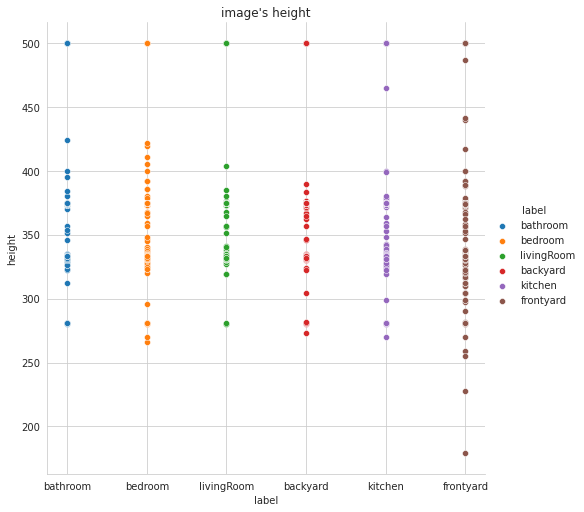

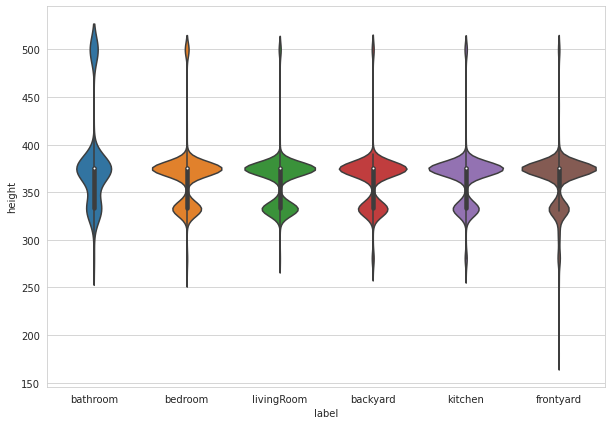

In [ ]:
plot_graphs(image_df,"height")

#### Observation:
* Images height varies from 179 to 500.
* 63.9% of the images have height of 375.


###Width:

In [ ]:
image_df['width'].describe()

count    5859.000000
mean      494.717187
std        27.810522
min       280.000000
25%       500.000000
50%       500.000000
75%       500.000000
max       500.000000
Name: width, dtype: float64

In [ ]:
sum(image_df['width']==500)/len(image_df['width'])*100

96.33043181430278

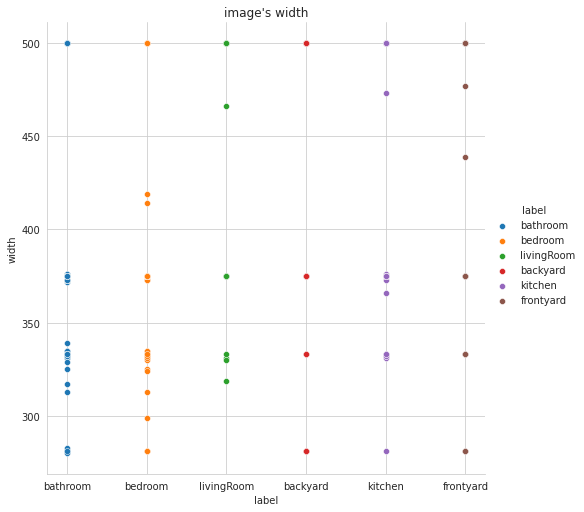

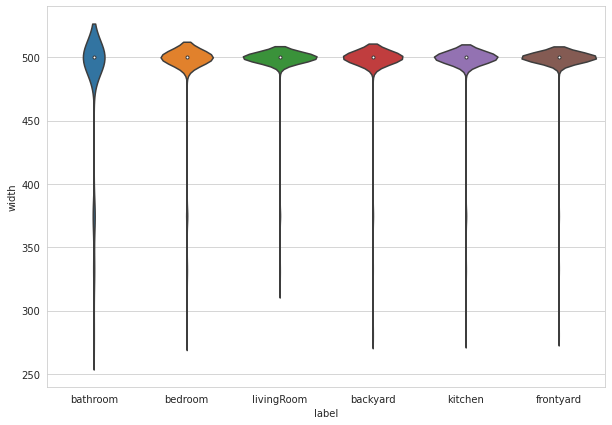

In [ ]:
plot_graphs(image_df,"width")

####Observation:
* 96.3% of images have width of 500 (pixels).

###Channels:

In [ ]:
image_df['dimension'].describe()

count    5859.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: dimension, dtype: float64

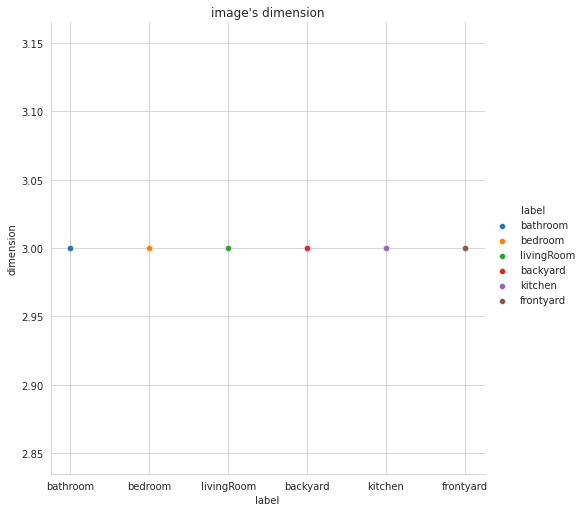

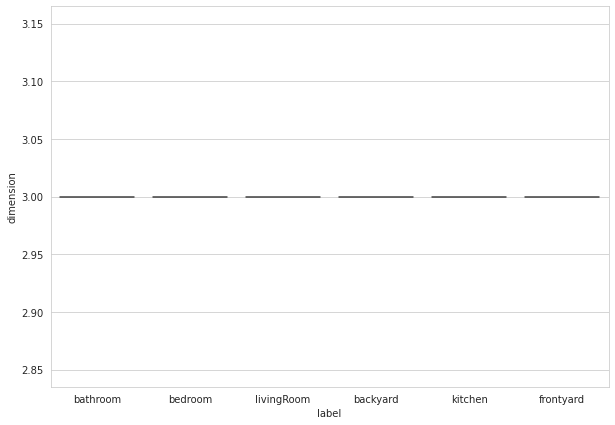

In [ ]:
plot_graphs(image_df,"dimension")

####Observation:
* All the images are 3 channel images.

###Image Format:

In [ ]:
image_df['format'].value_counts()

jpg     4246
jpeg    1607
png        5
JPG        1
Name: format, dtype: int64

Notes on types of image file formats:

* There are actually no differences between the JPG and JPEG formats.
* JPEG stands for “Joint Photographic Experts Group”. 
* PNG is short for "Portable Network Graphic".
* JPEG and PNG both are a type of image format to store images. JPEG uses lossy compression algorithm and image may lost some of its data whereas PNG uses lossless compression algorithm and no image data loss is present in PNG format.


Source:
* https://www.keycdn.com/support/difference-between-jpg-and-jpeg
* https://www.tutorialspoint.com/difference-between-jpeg-and-png#:~:text=JPEG%20and%20PNG%20both%20are,is%20present%20in%20PNG%20format.


##Summary of EDA:
* The dataset we have is imbalance dataset.
* 27.19% of the image are bedroom labeled. ( which is more then one-forth of the dataset).
* Since, imbalance dataset we will use precision and recall as primary metric and accuracy as secondary metric.
* The size of the images are not same, need to resize all the image to same size in data preprocessing.
* All the images are 3 channel images.

## Some random images of each label:

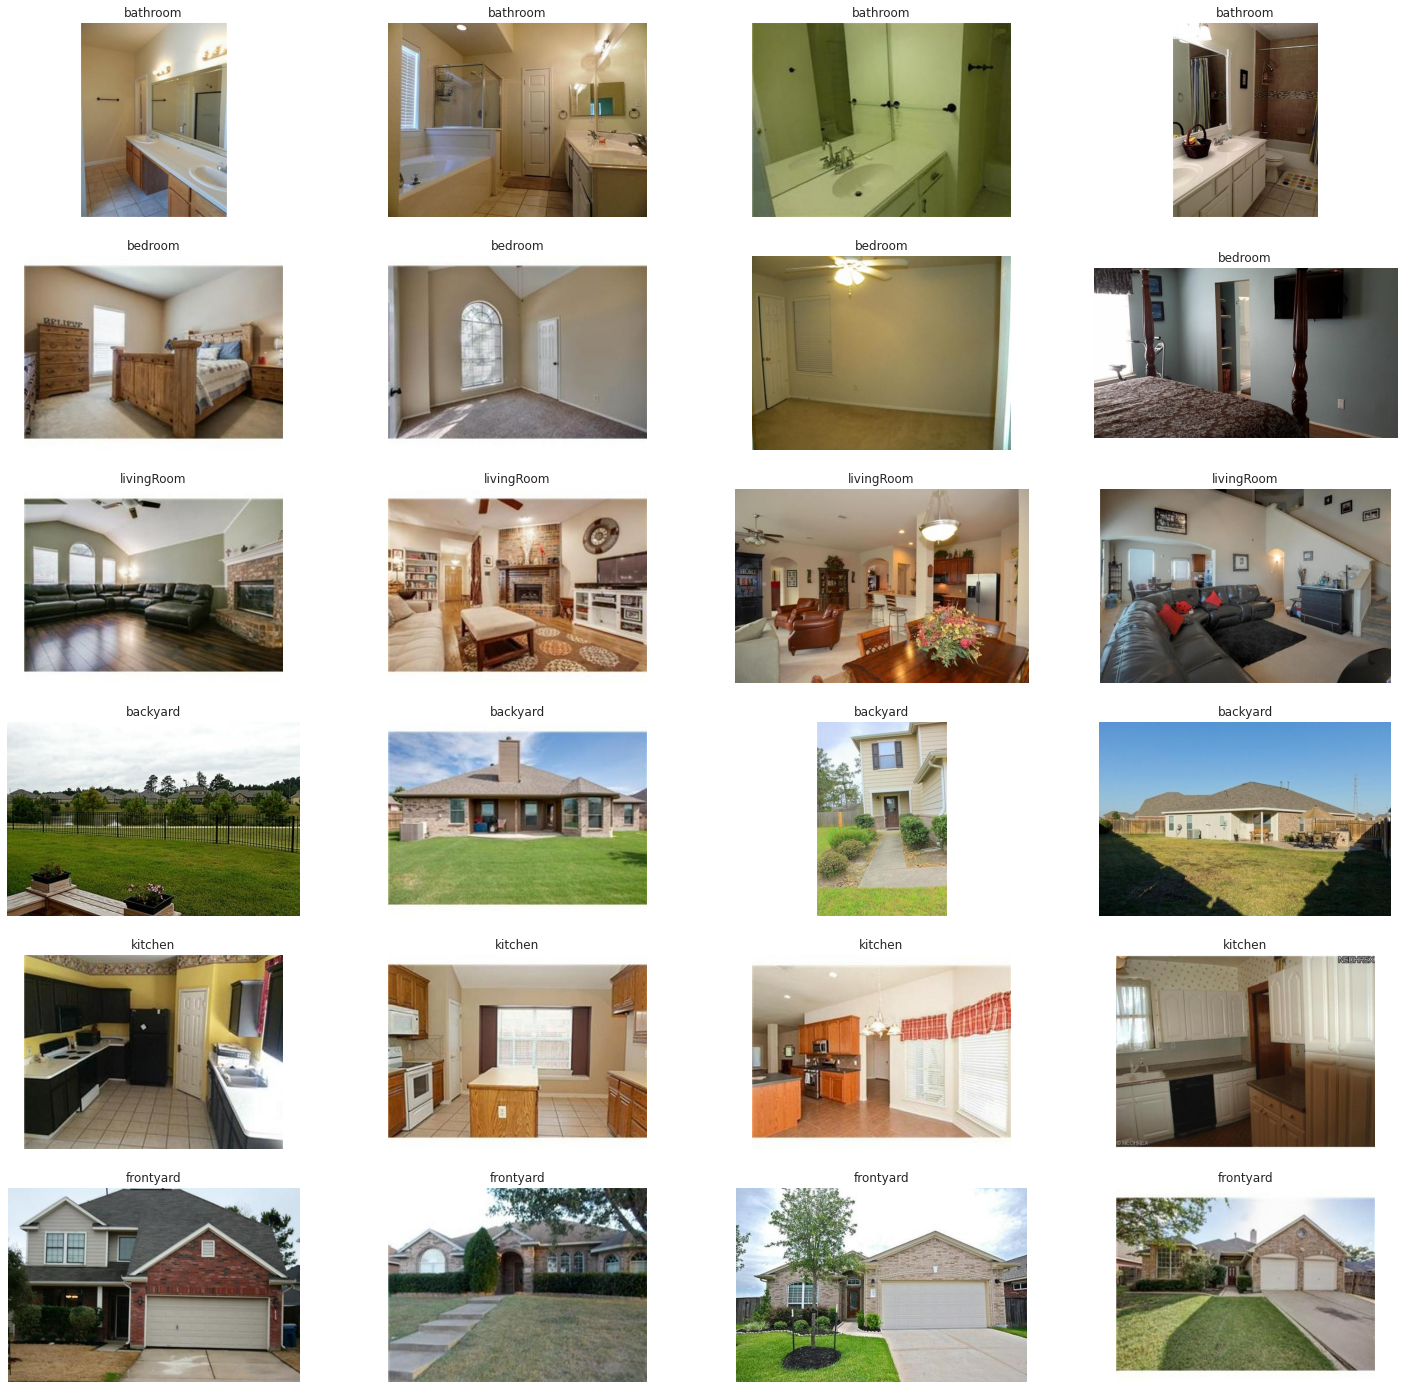

In [ ]:
#image_df
fig = plt.figure(figsize =(25, 25))

import random
cnt=0
for index,label in enumerate(labels):
  #print(index,label)
  paths= image_df[image_df['label']==label]['file_path'].values
  lt = paths[random.sample(range(0, 650), 4)]
  for img_path in lt:
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cnt=cnt+1
    
    
    plt.subplot(6, 4, cnt)
    plt.grid(False)
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)
  

## Baseline Model:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_enc = LabelEncoder()

image_df['label_enc'] = le_enc.fit_transform(image_df.label.values)

dict(zip(le_enc.classes_,le_enc.transform(le_enc.classes_)))

{'backyard': 0,
 'bathroom': 1,
 'bedroom': 2,
 'frontyard': 3,
 'kitchen': 4,
 'livingRoom': 5}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_df, image_df['label_enc'], test_size=0.15, random_state=42,stratify=image_df['label'])

print(" X_train  shape :", X_train.shape)
print(" X_test shape :", X_test.shape)
print(" y_train shape :", y_train.shape)
print(" y_test  shape :", y_test.shape)

 X_train  shape : (4980, 7)
 X_test shape : (879, 7)
 y_train shape : (4980,)
 y_test  shape : (879,)


In [ ]:
#rm -r /content/REI-Dataset_train

In [ ]:
train_data_images = '/content/REI-Dataset_train'
test_data_images = '/content/REI-Dataset_test'

for dir_name in labels:
    os.makedirs(os.path.join(train_data_images, dir_name))
    os.makedirs(os.path.join(test_data_images, dir_name))

In [ ]:
import shutil
from tqdm import tqdm
for index in tqdm(X_train['file_path'].index):
  path=X_train["file_path"][index]
  sub_dir=X_train['label'][index]
  shutil.copy(path ,train_data_images+'/'+sub_dir+'/'+ os.path.basename(path))

100%|██████████| 4980/4980 [00:00<00:00, 5127.65it/s]


In [ ]:
import shutil
from tqdm import tqdm
for index in tqdm(X_test['file_path'].index):
  path=X_test["file_path"][index]
  sub_dir=X_test['label'][index]
  shutil.copy(path ,test_data_images+'/'+sub_dir+'/'+ os.path.basename(path))

100%|██████████| 879/879 [00:00<00:00, 5022.15it/s]


In [ ]:
from keras.layers import Embedding
from keras.layers import Conv1D 
from keras.layers.merge import concatenate
from keras.layers import MaxPooling1D 
from keras.layers import Flatten
from keras.layers import Dropout
# Shared Feature Extraction Layer
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
import tensorflow as tf
from keras.models import Model
from keras.layers import Input

from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=15, width_shift_range=0.2,rescale=1./255, \
                                                            height_shift_range=0.2, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=32)


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=32)


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


In [ ]:


input_layer = Input(shape=(128,128,3))

conv_layer_1 = Conv2D(512, (2,2), padding='valid', activation = 'relu')(input_layer)

max_pooling_layer_1 = MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid")(conv_layer_1)

conv_layer_2 = Conv2D(256, (2,2), padding='valid', activation = 'relu')(max_pooling_layer_1)

max_pooling_layer_2 = MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid",)(conv_layer_2)

conv_layer_3 = Conv2D(128, (2,2), padding='valid', activation ='relu')(max_pooling_layer_2)

flatten_layer = Flatten()(conv_layer_3)

drop_out_layer = Dropout(0.2)(flatten_layer)

dense_layer_1 = Dense(64, activation='relu')(drop_out_layer)
dense_layer_2 = Dense(48, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
output_layer = Dense(6, activation='softmax')(dense_layer_3)
    
model = Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 512)     6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       524544    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       131200

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy',\
              metrics=['accuracy'])


In [ ]:
model.fit(ImageGenerator_train,\
          validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=20)

Epoch 1/20
128/128 [==============================] - 54s 314ms/step - loss: 1.7435 - accuracy: 0.2551 - val_loss: 1.6794 - val_accuracy: 0.2799
Epoch 2/20
128/128 [==============================] - 41s 319ms/step - loss: 1.6267 - accuracy: 0.3274 - val_loss: 1.5249 - val_accuracy: 0.3982
Epoch 3/20
128/128 [==============================] - 39s 305ms/step - loss: 1.5011 - accuracy: 0.4014 - val_loss: 1.3864 - val_accuracy: 0.4846
Epoch 4/20
128/128 [==============================] - 40s 312ms/step - loss: 1.3756 - accuracy: 0.4540 - val_loss: 1.2675 - val_accuracy: 0.5119
Epoch 5/20
128/128 [==============================] - 39s 304ms/step - loss: 1.2879 - accuracy: 0.4640 - val_loss: 1.2126 - val_accuracy: 0.4881
Epoch 6/20
128/128 [==============================] - 39s 303ms/step - loss: 1.2165 - accuracy: 0.4919 - val_loss: 1.1110 - val_accuracy: 0.5336
Epoch 7/20
128/128 [==============================] - 39s 303ms/step - loss: 1.1641 - accuracy: 0.4946 - val_loss: 1.1613 - val_ac

In [ ]:
model.fit(ImageGenerator_train,\
          validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=20)

Epoch 1/20
128/128 [==============================] - 42s 324ms/step - loss: 0.9979 - accuracy: 0.5661 - val_loss: 0.9909 - val_accuracy: 0.6086
Epoch 2/20
128/128 [==============================] - 39s 305ms/step - loss: 0.9807 - accuracy: 0.5835 - val_loss: 0.9499 - val_accuracy: 0.6303
Epoch 3/20
128/128 [==============================] - 39s 305ms/step - loss: 0.9903 - accuracy: 0.5671 - val_loss: 0.9677 - val_accuracy: 0.5995
Epoch 4/20
128/128 [==============================] - 39s 306ms/step - loss: 0.9950 - accuracy: 0.5720 - val_loss: 1.0136 - val_accuracy: 0.5939
Epoch 5/20
128/128 [==============================] - 39s 305ms/step - loss: 0.9688 - accuracy: 0.5884 - val_loss: 0.9640 - val_accuracy: 0.6143
Epoch 6/20
128/128 [==============================] - 39s 305ms/step - loss: 0.9815 - accuracy: 0.5720 - val_loss: 0.9066 - val_accuracy: 0.6325
Epoch 7/20
128/128 [==============================] - 39s 304ms/step - loss: 0.9700 - accuracy: 0.5788 - val_loss: 1.0192 - val_ac

In [ ]:

model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')  # creates a HDF5 file 'my_model.h5'



In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')

model.fit(ImageGenerator_train,validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=20)

Epoch 1/20
128/128 [==============================] - 40s 309ms/step - loss: 0.9181 - accuracy: 0.6082 - val_loss: 0.9479 - val_accuracy: 0.6405
Epoch 2/20
128/128 [==============================] - 39s 303ms/step - loss: 0.9365 - accuracy: 0.5984 - val_loss: 0.9598 - val_accuracy: 0.6234
Epoch 3/20
128/128 [==============================] - 40s 312ms/step - loss: 0.9170 - accuracy: 0.6143 - val_loss: 0.8285 - val_accuracy: 0.6792
Epoch 4/20
128/128 [==============================] - 39s 306ms/step - loss: 0.9213 - accuracy: 0.6058 - val_loss: 0.9770 - val_accuracy: 0.6234
Epoch 5/20
128/128 [==============================] - 39s 305ms/step - loss: 0.9010 - accuracy: 0.6082 - val_loss: 0.9155 - val_accuracy: 0.6496
Epoch 6/20
128/128 [==============================] - 40s 310ms/step - loss: 0.9189 - accuracy: 0.6016 - val_loss: 0.8563 - val_accuracy: 0.6712
Epoch 7/20
128/128 [==============================] - 39s 306ms/step - loss: 0.8983 - accuracy: 0.6207 - val_loss: 0.8583 - val_ac

In [ ]:
model.fit(ImageGenerator_train,validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=20)

Epoch 1/20
128/128 [==============================] - 42s 329ms/step - loss: 0.8795 - accuracy: 0.6348 - val_loss: 0.7953 - val_accuracy: 0.6894
Epoch 2/20
128/128 [==============================] - 39s 306ms/step - loss: 0.8699 - accuracy: 0.6401 - val_loss: 0.8113 - val_accuracy: 0.6815
Epoch 3/20
128/128 [==============================] - 40s 315ms/step - loss: 0.8755 - accuracy: 0.6374 - val_loss: 0.9149 - val_accuracy: 0.6587
Epoch 4/20
128/128 [==============================] - 39s 306ms/step - loss: 0.8831 - accuracy: 0.6298 - val_loss: 0.8673 - val_accuracy: 0.6769
Epoch 5/20
128/128 [==============================] - 39s 306ms/step - loss: 0.8495 - accuracy: 0.6405 - val_loss: 0.8587 - val_accuracy: 0.6689
Epoch 6/20
128/128 [==============================] - 39s 306ms/step - loss: 0.8696 - accuracy: 0.6339 - val_loss: 0.8120 - val_accuracy: 0.6792
Epoch 7/20
128/128 [==============================] - 39s 307ms/step - loss: 0.8596 - accuracy: 0.6347 - val_loss: 0.8331 - val_ac

In [ ]:

model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')  # creates a HDF5 file 'my_model.h5'



In [ ]:
model.fit(ImageGenerator_train,validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=100)

Epoch 1/100
128/128 [==============================] - 40s 308ms/step - loss: 0.8467 - accuracy: 0.6440 - val_loss: 0.8614 - val_accuracy: 0.6519
Epoch 2/100
128/128 [==============================] - 39s 304ms/step - loss: 0.8251 - accuracy: 0.6499 - val_loss: 0.8680 - val_accuracy: 0.6724
Epoch 3/100
128/128 [==============================] - 39s 305ms/step - loss: 0.8255 - accuracy: 0.6457 - val_loss: 0.7825 - val_accuracy: 0.6951
Epoch 4/100
128/128 [==============================] - 39s 305ms/step - loss: 0.8244 - accuracy: 0.6469 - val_loss: 0.8119 - val_accuracy: 0.6894
Epoch 5/100
128/128 [==============================] - 39s 305ms/step - loss: 0.8207 - accuracy: 0.6555 - val_loss: 0.8221 - val_accuracy: 0.6849
Epoch 6/100
128/128 [==============================] - 39s 305ms/step - loss: 0.8277 - accuracy: 0.6570 - val_loss: 0.7687 - val_accuracy: 0.7019
Epoch 7/100
128/128 [==============================] - 39s 307ms/step - loss: 0.8301 - accuracy: 0.6445 - val_loss: 0.8359 -

In [ ]:

model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
model.fit(ImageGenerator_train,validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=100)

Epoch 1/100
128/128 [==============================] - 44s 340ms/step - loss: 0.6930 - accuracy: 0.7189 - val_loss: 0.6576 - val_accuracy: 0.7349
Epoch 2/100
128/128 [==============================] - 39s 307ms/step - loss: 0.6907 - accuracy: 0.7162 - val_loss: 0.7024 - val_accuracy: 0.7213
Epoch 3/100
128/128 [==============================] - 39s 305ms/step - loss: 0.6862 - accuracy: 0.7216 - val_loss: 0.6892 - val_accuracy: 0.7383
Epoch 4/100
128/128 [==============================] - 39s 305ms/step - loss: 0.6788 - accuracy: 0.7265 - val_loss: 0.7301 - val_accuracy: 0.7031
Epoch 5/100
128/128 [==============================] - 41s 320ms/step - loss: 0.6876 - accuracy: 0.7189 - val_loss: 0.6321 - val_accuracy: 0.7577
Epoch 6/100
128/128 [==============================] - 39s 303ms/step - loss: 0.6778 - accuracy: 0.7282 - val_loss: 0.6808 - val_accuracy: 0.7383
Epoch 7/100
128/128 [==============================] - 39s 304ms/step - loss: 0.6751 - accuracy: 0.7223 - val_loss: 0.6688 -

In [ ]:

model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
model.fit(ImageGenerator_train,validation_data=ImageGenerator_test,\
         steps_per_epoch=128, epochs=100)

Epoch 1/100
128/128 [==============================] - 43s 328ms/step - loss: 0.6022 - accuracy: 0.7539 - val_loss: 0.6660 - val_accuracy: 0.7577
Epoch 2/100
128/128 [==============================] - 40s 314ms/step - loss: 0.5998 - accuracy: 0.7556 - val_loss: 0.6094 - val_accuracy: 0.7679
Epoch 3/100
128/128 [==============================] - 39s 304ms/step - loss: 0.5867 - accuracy: 0.7652 - val_loss: 0.6943 - val_accuracy: 0.7418
Epoch 4/100
128/128 [==============================] - 39s 305ms/step - loss: 0.5910 - accuracy: 0.7651 - val_loss: 0.6261 - val_accuracy: 0.7668
Epoch 5/100
128/128 [==============================] - 39s 305ms/step - loss: 0.6075 - accuracy: 0.7566 - val_loss: 0.6207 - val_accuracy: 0.7668
Epoch 6/100
128/128 [==============================] - 39s 306ms/step - loss: 0.6121 - accuracy: 0.7507 - val_loss: 0.6334 - val_accuracy: 0.7679
Epoch 7/100
128/128 [==============================] - 39s 305ms/step - loss: 0.5936 - accuracy: 0.7600 - val_loss: 0.6723 -

In [ ]:

model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/baseline_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
y_true=[]
y_pred=[]
cnt=0
for x,y in ImageGenerator_test:
  #print(x.shape)
  #print(y.shape)
  cnt = cnt+1
  if x.shape[0]==32 and cnt<=1000:
    y_pred.extend(list(np.argmax(model.predict(x),axis=1)))
    y_true.extend(np.argmax(y,axis=1))
  else:
    break
  

In [ ]:
len(y_pred)

864

In [ ]:
list(ImageGenerator_test.class_indices.keys())

['backyard', 'bathroom', 'bedroom', 'frontyard', 'kitchen', 'livingRoom']

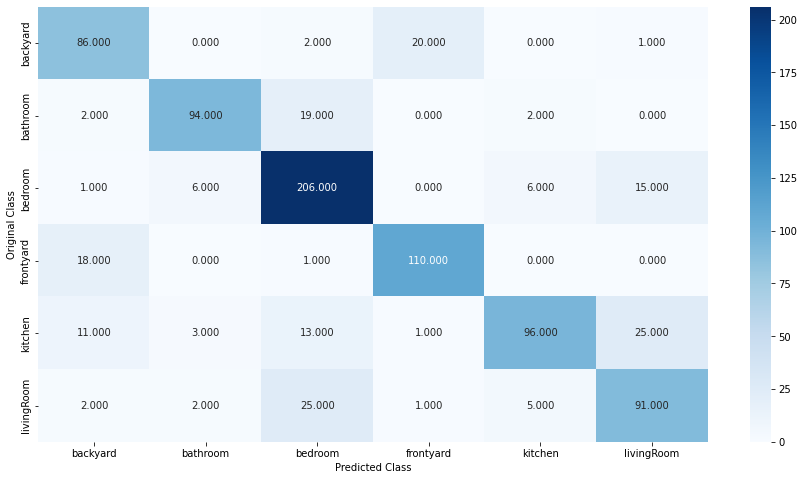

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = list(ImageGenerator_test.class_indices.keys())

cm = confusion_matrix(y_true, y_pred, labels=list(ImageGenerator_test.class_indices.values()))

plt.figure(figsize=(15,8))



sns.heatmap(cm, annot=True, cmap='Blues', fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
precision = true_pos = np.diag(cm) /np.sum(cm,axis=0)
recall = true_pos = np.diag(cm) /np.sum(cm,axis=1)

In [ ]:
from prettytable import PrettyTable

columns = ["label", "Precision", "Recall"]

table = PrettyTable()

# Add Columns
table.add_column(columns[0], labels)
table.add_column(columns[1],list(map(lambda x : round(x,4),precision)))
table.add_column(columns[2], list(map(lambda x : round(x,4),recall)))

print(table)


+------------+-----------+--------+
|   label    | Precision | Recall |
+------------+-----------+--------+
|  backyard  |   0.7167  | 0.789  |
|  bathroom  |   0.8952  | 0.8034 |
|  bedroom   |   0.7744  | 0.8803 |
| frontyard  |   0.8333  | 0.8527 |
|  kitchen   |   0.8807  | 0.6443 |
| livingRoom |   0.6894  | 0.7222 |
+------------+-----------+--------+


###Observation:

* Epoch: 340
* Train Accuracy: 78.83%
* Test Accuracy: 79.29%

## Experiment: Seeing the difference b/w enhanced image and normal image
* enhancing the image using  CLAHE

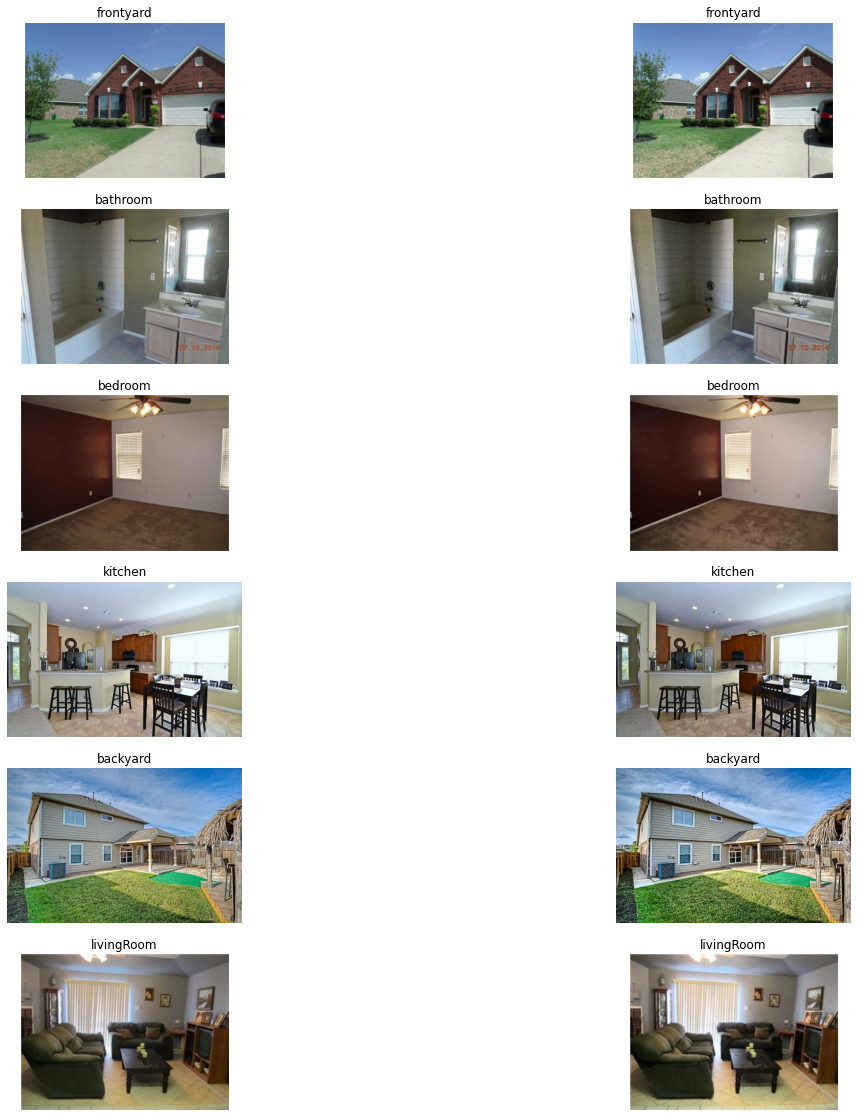

In [ ]:
def plot_img(image,label,cnt,gray=False):
    plt.subplot(6, 2, cnt)
    plt.grid(False)
    plt.axis('off')
    plt.title(label)
    if gray==True:
      plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    else:
      plt.imshow(image)

#image_df
fig = plt.figure(figsize =(20, 20))

import random
cnt=0
for index,label in enumerate(labels):
  #print(index,label)
  paths= image_df[image_df['label']==label]['file_path'].values
  lt = paths[random.sample(range(0, 650), 1)]
  for img_path in lt:
    
    image = cv2.imread(img_path)
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cnt=cnt+1
    #fig = plt.figure(figsize =(6, 4))

    plot_img(image1,label,cnt)
    '''
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cnt=cnt+1
    plot_img(grayscale_img,label,cnt,gray=True)
    '''

    
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=1,tileGridSize=(1,1))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    cnt=cnt+1
    plot_img(enhanced_img,label,cnt,gray=False)
    '''
    enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    cnt=cnt+1
    plot_img(enhanced_grayscale_img,label,cnt,gray=True)
    '''
    


plt.show()

  

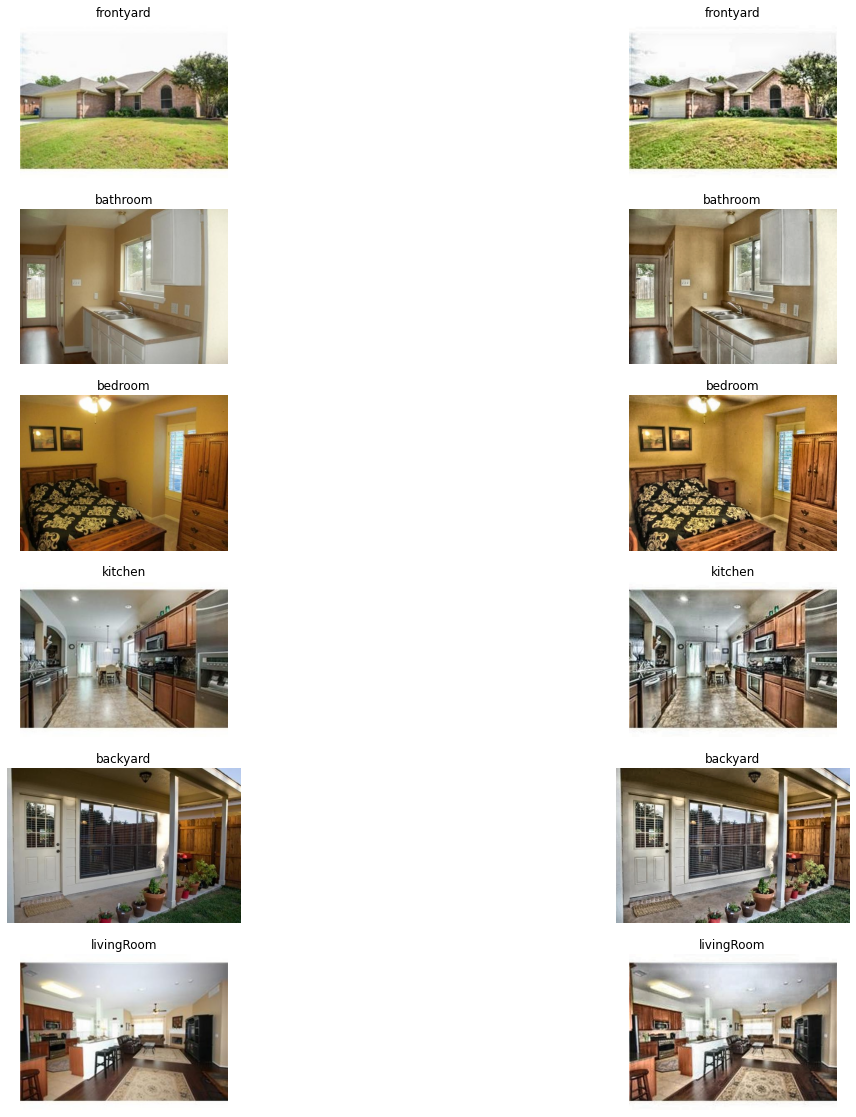

In [ ]:
def plot_img(image,label,cnt,gray=False):
    plt.subplot(6, 2, cnt)
    plt.grid(False)
    plt.axis('off')
    plt.title(label)
    if gray==True:
      plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    else:
      plt.imshow(image)

#image_df
fig = plt.figure(figsize =(20, 20))

import random
cnt=0
for index,label in enumerate(labels):
  #print(index,label)
  paths= image_df[image_df['label']==label]['file_path'].values
  lt = paths[random.sample(range(0, 650), 1)]
  for img_path in lt:
    
    image = cv2.imread(img_path)
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cnt=cnt+1
    #fig = plt.figure(figsize =(6, 4))

    plot_img(image1,label,cnt)
    '''
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cnt=cnt+1
    plot_img(grayscale_img,label,cnt,gray=True)
    '''

    
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    cnt=cnt+1
    plot_img(enhanced_img,label,cnt,gray=False)
    '''
    enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    cnt=cnt+1
    plot_img(enhanced_grayscale_img,label,cnt,gray=True)
    '''
    


plt.show()

  

difference is clearly observed in living room images

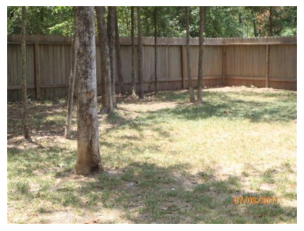

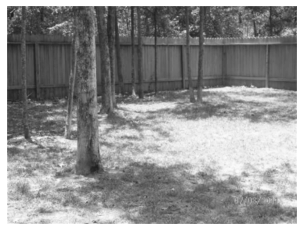

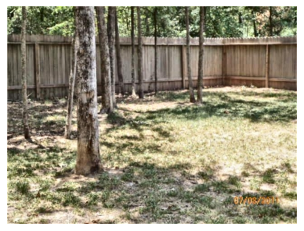

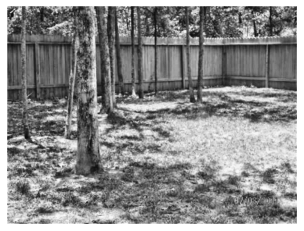

'\nfrom google.colab.patches import cv2_imshow\ncv2_imshow(bgr)\n'

In [ ]:
bgr = cv2.imread("/content/REI-Dataset_/backyard/backyard (1).jpeg")
RGB_img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.grid(False)
plt.axis('off')
plt.show()
grayscale = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.axis('off')
plt.show()

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
plt.imshow(bgr)
plt.grid(False)
plt.axis('off')
plt.show()
grayscale = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.axis('off')
plt.show()

'''
from google.colab.patches import cv2_imshow
cv2_imshow(bgr)
'''
#test

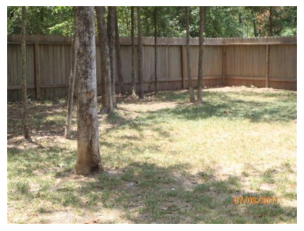

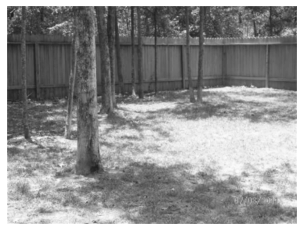

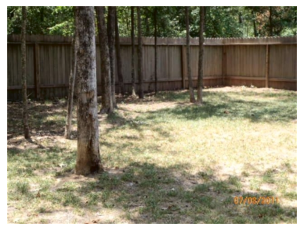

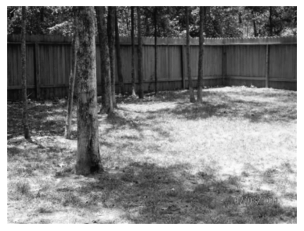

'\nfrom google.colab.patches import cv2_imshow\ncv2_imshow(bgr)\n'

In [ ]:
bgr = cv2.imread("/content/REI-Dataset_/backyard/backyard (1).jpeg")
RGB_img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.grid(False)
plt.axis('off')
plt.show()
grayscale = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.axis('off')
plt.show()

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=1.0,tileGridSize=(1,1))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
plt.imshow(bgr)
plt.grid(False)
plt.axis('off')
plt.show()
grayscale = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.axis('off')
plt.show()

'''
from google.colab.patches import cv2_imshow
cv2_imshow(bgr)
'''
#test

### Observation:
* By using CLAHE , we can extra imformation in grayscale image

In [ ]:
#!zip -r '/content/REI-Dataset_train.zip' '/content/REI-Dataset_train'

## Grayscale LSTM Model:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

### Data Pre processing:

In [ ]:
!gdown --id 1s3JydD_s4sR_HOwyH7FhzKGqXlWrhpAs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1s3JydD_s4sR_HOwyH7FhzKGqXlWrhpAs
To: /content/Train_Test_Data.zip
100% 302M/302M [00:01<00:00, 217MB/s]


In [ ]:
!unzip '/content/Train_Test_Data.zip'

In [ ]:
test_data_path  = '/content/Train_Test_Data/REI-Dataset_test'
train_data_path = '/content/Train_Test_Data/REI-Dataset_train'

labels=[]

for (root,dirs,files) in os.walk(train_data_path, topdown=True):
  if(len(files)>0):
    
    labels.append(root[root.rfind('/')+1:])
labels

['backyard', 'kitchen', 'frontyard', 'bedroom', 'livingRoom', 'bathroom']

In [ ]:
from tqdm.notebook import tqdm_notebook

### Appling CLAHE on image to enhance image and converting it to grayscale image 

#### Train data:

In [ ]:
for label in labels:

  path = train_data_path + '/' + label
  files = os.listdir(path)

  for file in tqdm_notebook(files):
    img_path = os.path.join(path, file)
    
    image = cv2.imread(img_path)    # reading the image

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    filename = os.path.join(path,'enh_gray_'+file)
    
    cv2.imwrite(filename, enhanced_grayscale_img)   # saving the gray scale image
    os.remove(img_path)

  0%|          | 0/633 [00:00<?, ?it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

  0%|          | 0/1354 [00:00<?, ?it/s]

  0%|          | 0/752 [00:00<?, ?it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

  0%|          | 0/724 [00:00<?, ?it/s]

#### Test Data:

In [ ]:
for label in labels:

  path = test_data_path + '/' + label
  files = os.listdir(path)

  for file in tqdm_notebook(files):
    img_path = os.path.join(path, file)
    
    image = cv2.imread(img_path)

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    filename = os.path.join(path,'enh_gray_'+file)
    
    cv2.imwrite(filename, enhanced_grayscale_img)
    os.remove(img_path)

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

In [ ]:
!zip -r '/content/REI-Dataset_pp_train_test.zip' '/content/Train_Test_Data'

### Modeling:

In [ ]:
class LSTM_network(tf.keras.Model):
    '''
    LSTM_network model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,lstm_units):
        super().__init__()

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.lstm_initial_h = 0
        self.lstm_initial_c = 0

        self.h_lstm_output = 0
        self.h_lstm_final_state_h = 0 
        self.h_lstm_final_state_c  = 0

        self.v_lstm_output = 0 
        self.v_lstm_final_state_h = 0
        self.v_lstm_final_state_c  = 0 

        self.lstm_units = lstm_units
                
        self.h_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="h_LSTM")

        self.v_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="v_LSTM")

    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the lstm.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        #print(' input shape : ',input_sequence.shape)
        
        input_sequence = tf.squeeze(input_sequence, axis=-1, name=None)
        #print(' input shape : ',input_sequence.shape)

        v_input_sequence = tf.transpose( input_sequence, perm=[0, 2, 1], name='transpose')
        #print(' v_input_sequence shape : ',v_input_sequence.shape)
        #print(' initial_states shape : ',initial_states[0].shape,initial_states[1].shape)


        self.lstm_initial_h = initial_states[0]
        self.lstm_initial_c = initial_states[1]
        
        self.h_lstm_output , self.h_lstm_final_state_h , self.h_lstm_final_state_c = self.h_lstm_layer(input_sequence,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 
        
        self.v_lstm_output , self.v_lstm_final_state_h , self.v_lstm_final_state_c = self.v_lstm_layer(v_input_sequence,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 
        
        
        #print(' h_lstm_final_state_h output shape : ',self.h_lstm_final_state_h.shape)
        #print(' h_lstm_final_state_c output shape : ',self.h_lstm_final_state_c.shape)
        
        

        return self.h_lstm_output , self.v_lstm_output

    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''

      self.lstm_state_h = tf.zeros((batch_size,self.lstm_units))
      self.lstm_state_c = tf.zeros((batch_size,self.lstm_units))

      return self.lstm_state_h,self.lstm_state_c


    def get_config(self):
        return {'lstm_units': self.lstm_units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
def grader_lstm_nw():
    '''
        verifying the LSTM_network class

        input_row_length: rows of image,
        lstm_units: LSTM units,
        batch_size
    '''
        
    input_row_length=128
    input_col_length = 256
    lstm_units=32
    batch_size=64
    
    input_seq=tf.random.uniform(shape=(batch_size,input_row_length,input_col_length,1),maxval=10,minval=0,dtype=tf.float32)

    

    state_h=tf.random.uniform(shape=[batch_size,lstm_units],dtype=tf.float32)
    state_c=tf.random.uniform(shape=[batch_size,lstm_units],dtype=tf.float32)
    states=[state_h,state_c]
    lstm= LSTM_network(lstm_units)
    states = lstm.initialize_states(batch_size)
    h_lstm,v_lstm=lstm(input_seq, states)
    print(h_lstm.shape)
    print(v_lstm.shape)
    assert(h_lstm.shape==(batch_size,lstm_units))
    return True
print(grader_lstm_nw())

(64, 32)
(64, 32)
True


In [ ]:
class main_framwork(tf.keras.Model):
    
    def __init__(self,lstm_units,output_class_cnt,batch_size):
        super().__init__()

        self.lstm_units         =     lstm_units   
        self.output_class_cnt   =     output_class_cnt     
        self.batch_size         =     batch_size
        
        self.lstm_network = LSTM_network(self.lstm_units)

        self.dense_layer_1 = Dense(128, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=12))
        #self.dense_layer_2 = Dense(128, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=45))
        self.dense_layer_3 = Dense(64, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=65))
        
        self.output_layer = Dense(self.output_class_cnt, activation='softmax')
        
    
    
    def call(self,input_data):
       
        
        #print(input_data.shape)
        '''
        print(input_data.shape)
        print(output_data.shape)
        '''
 
        #print('--------------------------------')

        initial_states =  self.lstm_network.initialize_states(batch_size = self.batch_size)
        h_lstm_output,v_lstm_output = self.lstm_network(input_data,initial_states)
        '''
        print(h_lstm_output.shape)
        print(v_lstm_output.shape)
        '''
        lstm_output = tf.concat([h_lstm_output, v_lstm_output], 1)

        #print(lstm_output.shape)

        dense_1 = self.dense_layer_1(lstm_output)
        #dense_2 = self.dense_layer_2(dense_1)
        dense_3 = self.dense_layer_3(dense_1)
        dense_output = self.output_layer(dense_3)

        #print('dense output shape : ',dense_output.shape)

        return dense_output

    def get_config(self):
        return {'lstm_units'   : self.lstm_units    ,            
                'output_class_cnt'     : self.output_class_cnt ,
                'batch_size'    : self.batch_size
                }
               
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
 '''
 X_train  shape : (4980, 7)
 X_test shape : (879, 7)
 y_train shape : (4980,)
 y_test  shape : (879,)
'''

In [ ]:
labels

['backyard', 'kitchen', 'frontyard', 'bedroom', 'livingRoom', 'bathroom']

In [ ]:
train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=15, width_shift_range=0.2,rescale=1./255, \
                                                            height_shift_range=0.2, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=30,\
                                                     class_mode = 'categorical', color_mode = 'grayscale' )


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=30,\
                                                         class_mode = 'categorical', color_mode = 'grayscale')


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


#### Fitting model1:

In [ ]:
train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=5, width_shift_range=0.1,rescale=1./255, \
                                                            height_shift_range=0.1, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=30,\
                                                     class_mode = 'categorical', color_mode = 'grayscale' )


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=30,\
                                                         class_mode = 'categorical', color_mode = 'grayscale')


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


In [ ]:
lstm_units        = 64
output_class_cnt  = len(labels)
batch_size        = 10

model = main_framwork(lstm_units,output_class_cnt,batch_size)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_func= tf.keras.losses.CategoricalCrossentropy()#tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer,loss=loss_func,metrics=['accuracy'])

train_steps   =     4980//batch_size
valid_steps   =     879//batch_size

NAME = "model_1"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME),histogram_freq=1,write_images=True)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 35s 59ms/step - loss: 1.6327 - accuracy: 0.3382 - val_loss: 1.5417 - val_accuracy: 0.3713
Epoch 2/100
498/498 [==============================] - 21s 42ms/step - loss: 1.5218 - accuracy: 0.3886 - val_loss: 1.4910 - val_accuracy: 0.3966
Epoch 3/100
498/498 [==============================] - 20s 40ms/step - loss: 1.4801 - accuracy: 0.3986 - val_loss: 1.4645 - val_accuracy: 0.3989
Epoch 4/100
498/498 [==============================] - 20s 40ms/step - loss: 1.4365 - accuracy: 0.4169 - val_loss: 1.4043 - val_accuracy: 0.4322
Epoch 5/100
498/498 [==============================] - 22s 43ms/step - loss: 1.4161 - accuracy: 0.4323 - val_loss: 1.3832 - val_accuracy: 0.4402
Epoch 6/100
498/498 [==============================] - 20s 41ms/step - loss: 1.3859 - accuracy: 0.4506 - val_loss: 1.3725 - val_accuracy: 0.4747
Epoch 7/100
498/498 [==============================] - 20s 41ms/step - loss: 1.3557 - accuracy: 0.4528 - val_loss: 1.3376 - val_ac

In [ ]:
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 22s 45ms/step - loss: 0.8004 - accuracy: 0.6819 - val_loss: 0.8913 - val_accuracy: 0.6770
Epoch 2/100
498/498 [==============================] - 21s 43ms/step - loss: 0.8104 - accuracy: 0.6837 - val_loss: 0.8554 - val_accuracy: 0.6908
Epoch 3/100
498/498 [==============================] - 20s 41ms/step - loss: 0.8241 - accuracy: 0.6755 - val_loss: 0.8856 - val_accuracy: 0.6632
Epoch 4/100
498/498 [==============================] - 21s 42ms/step - loss: 0.8087 - accuracy: 0.6825 - val_loss: 0.8631 - val_accuracy: 0.6701
Epoch 5/100
498/498 [==============================] - 22s 44ms/step - loss: 0.7961 - accuracy: 0.6811 - val_loss: 0.8685 - val_accuracy: 0.6805
Epoch 6/100
498/498 [==============================] - 20s 41ms/step - loss: 0.7946 - accuracy: 0.6865 - val_loss: 0.9083 - val_accuracy: 0.6563
Epoch 7/100
498/498 [==============================] - 22s 44ms/step - loss: 0.7951 - accuracy: 0.6873 - val_loss: 0.8566 - val_ac

##### Obsevation of model1:
* Stopped Training as model tend to overfit.
* Details:
  > epoch : 200

  > Train accuracy: 74.54%

  > Test accuracy : 70.11%

#### Fitting model2:

* Sine the above model is overfitting, In this model I have done change in Data Augmentation elements
(ImageDataGenerator( rotation_range =20, width_shift_range=0.2,rescale=1./255 ,                                                              height_shift_range=0.2 , horizontal_flip=True)
)

In [ ]:

train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range =20, width_shift_range=0.2,rescale=1./255, \
                                                            height_shift_range=0.2, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                     class_mode = 'categorical', color_mode = 'grayscale' )


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                         class_mode = 'categorical', color_mode = 'grayscale',shuffle=False)


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


In [ ]:


lstm_units        = 64
output_class_cnt  = len(labels)
batch_size        = 10

model = main_framwork(lstm_units,output_class_cnt,batch_size)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_func= tf.keras.losses.CategoricalCrossentropy()#tf.keras.losses.SparseCategoricalCrossentropy()


model.compile(optimizer=optimizer,loss=loss_func,metrics=['accuracy'])

train_steps   =     4980//batch_size
valid_steps   =     879//batch_size

NAME = "model_1"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME),histogram_freq=1,write_images=True)




model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.
Epoch 1/100
498/498 [==============================] - 25s 44ms/step - loss: 1.7281 - accuracy: 0.2791 - val_loss: 1.6734 - val_accuracy: 0.3057
Epoch 2/100
498/498 [==============================] - 22s 44ms/step - loss: 1.6586 - accuracy: 0.3191 - val_loss: 1.6075 - val_accuracy: 0.3345
Epoch 3/100
498/498 [==============================] - 21s 41ms/step - loss: 1.6301 - accuracy: 0.3323 - val_loss: 1.5803 - val_accuracy: 0.3460
Epoch 4/100
498/498 [==============================] - 21s 43ms/step - loss: 1.6110 - accuracy: 0.3406 - val_loss: 1.5673 - val_accuracy: 0.3437
Epoch 5/100
498/498 [==============================] - 22s 44ms/step - loss: 1.5800 - accuracy: 0.3568 - val_loss: 1.5139 - val_accuracy: 0.3736
Epoch 6/100
498/498 [==============================] - 26s 53ms/step - loss: 1.5678 - accuracy: 0.3566 - val_loss: 1.5207 - val_accuracy: 0.3598
Epoch 7/100
498/498 [==========================

> epoch cnt:100

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

In [ ]:


train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range =20, width_shift_range=0.2,rescale=1./255, \
                                                            height_shift_range=0.2, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                     class_mode = 'categorical', color_mode = 'grayscale' )


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                         class_mode = 'categorical', color_mode = 'grayscale')


lstm_units        = 64
output_class_cnt  = len(labels)
batch_size        = 10

train_steps   =     4980//batch_size
valid_steps   =     879//batch_size

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model')

NAME = "model_1"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME),histogram_freq=1,write_images=True)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=200,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.
Epoch 1/200
498/498 [==============================] - 27s 44ms/step - loss: 1.1308 - accuracy: 0.5432 - val_loss: 1.0295 - val_accuracy: 0.5920
Epoch 2/200
498/498 [==============================] - 23s 46ms/step - loss: 1.1222 - accuracy: 0.5386 - val_loss: 1.0232 - val_accuracy: 0.5851
Epoch 3/200
498/498 [==============================] - 21s 42ms/step - loss: 1.1016 - accuracy: 0.5568 - val_loss: 1.0271 - val_accuracy: 0.5897
Epoch 4/200
498/498 [==============================] - 22s 43ms/step - loss: 1.1211 - accuracy: 0.5500 - val_loss: 1.0714 - val_accuracy: 0.5977
Epoch 5/200
498/498 [==============================] - 22s 45ms/step - loss: 1.1005 - accuracy: 0.5570 - val_loss: 0.9972 - val_accuracy: 0.6011
Epoch 6/200
498/498 [==============================] - 22s 43ms/step - loss: 1.1216 - accuracy: 0.5518 - val_loss: 1.0022 - val_accuracy: 0.5931
Epoch 7/200
498/498 [==========================

> epoch cnt:300

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 27s 54ms/step - loss: 0.9091 - accuracy: 0.6424 - val_loss: 0.7795 - val_accuracy: 0.6931
Epoch 2/100
498/498 [==============================] - 21s 42ms/step - loss: 0.9171 - accuracy: 0.6406 - val_loss: 0.7999 - val_accuracy: 0.6885
Epoch 3/100
498/498 [==============================] - 22s 43ms/step - loss: 0.9072 - accuracy: 0.6345 - val_loss: 0.7974 - val_accuracy: 0.6759
Epoch 4/100
498/498 [==============================] - 21s 42ms/step - loss: 0.9294 - accuracy: 0.6295 - val_loss: 0.8059 - val_accuracy: 0.6724
Epoch 5/100
498/498 [==============================] - 21s 43ms/step - loss: 0.9318 - accuracy: 0.6303 - val_loss: 0.8052 - val_accuracy: 0.6770
Epoch 6/100
498/498 [==============================] - 22s 44ms/step - loss: 0.9220 - accuracy: 0.6265 - val_loss: 0.7955 - val_accuracy: 0.6701
Epoch 7/100
498/498 [==============================] - 22s 44ms/step - loss: 0.9134 - accuracy: 0.6271 - val_loss: 0.8162 - val_ac

> epoch cnt:400

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 22s 44ms/step - loss: 0.8663 - accuracy: 0.6482 - val_loss: 0.7441 - val_accuracy: 0.6989
Epoch 2/100
498/498 [==============================] - 27s 55ms/step - loss: 0.8383 - accuracy: 0.6669 - val_loss: 0.7407 - val_accuracy: 0.6897
Epoch 3/100
498/498 [==============================] - 21s 43ms/step - loss: 0.8649 - accuracy: 0.6584 - val_loss: 0.7493 - val_accuracy: 0.7011
Epoch 4/100
498/498 [==============================] - 21s 42ms/step - loss: 0.8546 - accuracy: 0.6622 - val_loss: 0.7259 - val_accuracy: 0.7046
Epoch 5/100
498/498 [==============================] - 21s 41ms/step - loss: 0.8506 - accuracy: 0.6596 - val_loss: 0.7369 - val_accuracy: 0.7092
Epoch 6/100
498/498 [==============================] - 21s 43ms/step - loss: 0.8683 - accuracy: 0.6578 - val_loss: 0.7718 - val_accuracy: 0.6851
Epoch 7/100
498/498 [==============================] - 22s 44ms/step - loss: 0.8534 - accuracy: 0.6562 - val_loss: 0.7370 - val_ac

> epoch cnt:500

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 24s 49ms/step - loss: 0.8140 - accuracy: 0.6745 - val_loss: 0.7088 - val_accuracy: 0.7000
Epoch 2/100
498/498 [==============================] - 22s 44ms/step - loss: 0.8054 - accuracy: 0.6773 - val_loss: 0.7394 - val_accuracy: 0.6977
Epoch 3/100
498/498 [==============================] - 23s 45ms/step - loss: 0.8032 - accuracy: 0.6819 - val_loss: 0.6963 - val_accuracy: 0.7103
Epoch 4/100
498/498 [==============================] - 21s 42ms/step - loss: 0.8054 - accuracy: 0.6825 - val_loss: 0.7386 - val_accuracy: 0.6943
Epoch 5/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7914 - accuracy: 0.6819 - val_loss: 0.6947 - val_accuracy: 0.7080
Epoch 6/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7879 - accuracy: 0.6928 - val_loss: 0.7007 - val_accuracy: 0.7034
Epoch 7/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7974 - accuracy: 0.6845 - val_loss: 0.7360 - val_ac

> epoch cnt:600

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model')

In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.000001)
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 23s 42ms/step - loss: 0.7500 - accuracy: 0.6950 - val_loss: 0.6653 - val_accuracy: 0.7333
Epoch 2/100
498/498 [==============================] - 22s 43ms/step - loss: 0.7269 - accuracy: 0.7084 - val_loss: 0.6694 - val_accuracy: 0.7322
Epoch 3/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7203 - accuracy: 0.7133 - val_loss: 0.6686 - val_accuracy: 0.7287
Epoch 4/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7326 - accuracy: 0.7110 - val_loss: 0.6642 - val_accuracy: 0.7264
Epoch 5/100
498/498 [==============================] - 22s 44ms/step - loss: 0.7103 - accuracy: 0.7213 - val_loss: 0.6584 - val_accuracy: 0.7322
Epoch 6/100
498/498 [==============================] - 22s 45ms/step - loss: 0.7094 - accuracy: 0.7179 - val_loss: 0.6628 - val_accuracy: 0.7333
Epoch 7/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7200 - accuracy: 0.7173 - val_loss: 0.6589 - val_ac

> epoch cnt:700

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model2',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model2/assets


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model')

In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.00005)
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard])

Epoch 1/100
498/498 [==============================] - 22s 41ms/step - loss: 0.7268 - accuracy: 0.7062 - val_loss: 0.6803 - val_accuracy: 0.7253
Epoch 2/100
498/498 [==============================] - 22s 44ms/step - loss: 0.7224 - accuracy: 0.7145 - val_loss: 0.6564 - val_accuracy: 0.7379
Epoch 3/100
498/498 [==============================] - 20s 41ms/step - loss: 0.7165 - accuracy: 0.7141 - val_loss: 0.6678 - val_accuracy: 0.7287
Epoch 4/100
498/498 [==============================] - 21s 42ms/step - loss: 0.7207 - accuracy: 0.7127 - val_loss: 0.6600 - val_accuracy: 0.7310
Epoch 5/100
498/498 [==============================] - 20s 41ms/step - loss: 0.7181 - accuracy: 0.7120 - val_loss: 0.6654 - val_accuracy: 0.7310
Epoch 6/100
498/498 [==============================] - 21s 42ms/step - loss: 0.7055 - accuracy: 0.7139 - val_loss: 0.6545 - val_accuracy: 0.7368
Epoch 7/100
498/498 [==============================] - 22s 45ms/step - loss: 0.7210 - accuracy: 0.7110 - val_loss: 0.6610 - val_ac

> epoch cnt:800

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.01)
  
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard,lr_scheduler])

Epoch 1/100
498/498 [==============================] - 22s 44ms/step - loss: 0.7039 - accuracy: 0.7199 - val_loss: 0.6544 - val_accuracy: 0.7322 - lr: 5.0000e-05
Epoch 2/100
498/498 [==============================] - 21s 43ms/step - loss: 0.6893 - accuracy: 0.7253 - val_loss: 0.6712 - val_accuracy: 0.7310 - lr: 5.0000e-05
Epoch 3/100
498/498 [==============================] - 22s 44ms/step - loss: 0.6864 - accuracy: 0.7249 - val_loss: 0.6631 - val_accuracy: 0.7149 - lr: 5.0000e-05
Epoch 4/100
498/498 [==============================] - 21s 43ms/step - loss: 0.7017 - accuracy: 0.7255 - val_loss: 0.6839 - val_accuracy: 0.7276 - lr: 5.0000e-05
Epoch 5/100
498/498 [==============================] - 21s 42ms/step - loss: 0.7039 - accuracy: 0.7175 - val_loss: 0.6573 - val_accuracy: 0.7333 - lr: 5.0000e-05
Epoch 6/100
498/498 [==============================] - 22s 44ms/step - loss: 0.6899 - accuracy: 0.7325 - val_loss: 0.6442 - val_accuracy: 0.7310 - lr: 5.0000e-05
Epoch 7/100
498/498 [=======

> epoch cnt:900

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model/assets


In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.00005)


def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.01)
  
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [tensorboard,lr_scheduler])

Epoch 1/100
498/498 [==============================] - 21s 43ms/step - loss: 0.6699 - accuracy: 0.7410 - val_loss: 0.6884 - val_accuracy: 0.7195 - lr: 5.0000e-05
Epoch 2/100
498/498 [==============================] - 21s 43ms/step - loss: 0.6594 - accuracy: 0.7420 - val_loss: 0.6419 - val_accuracy: 0.7425 - lr: 5.0000e-05
Epoch 3/100
498/498 [==============================] - 22s 43ms/step - loss: 0.6768 - accuracy: 0.7359 - val_loss: 0.6452 - val_accuracy: 0.7379 - lr: 5.0000e-05
Epoch 4/100
498/498 [==============================] - 21s 43ms/step - loss: 0.6874 - accuracy: 0.7237 - val_loss: 0.6491 - val_accuracy: 0.7414 - lr: 5.0000e-05
Epoch 5/100
498/498 [==============================] - 20s 41ms/step - loss: 0.6844 - accuracy: 0.7273 - val_loss: 0.6446 - val_accuracy: 0.7264 - lr: 5.0000e-05
Epoch 6/100
498/498 [==============================] - 20s 41ms/step - loss: 0.6639 - accuracy: 0.7373 - val_loss: 0.6386 - val_accuracy: 0.7609 - lr: 5.0000e-05
Epoch 7/100
498/498 [=======

> epoch cnt:1000

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model')

In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.00001)

batch_size        = 10
train_steps   =     4980//batch_size
valid_steps   =     879//batch_size

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.05)
  
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [lr_scheduler])

Epoch 1/100
498/498 [==============================] - 136s 268ms/step - loss: 0.6444 - accuracy: 0.7504 - val_loss: 0.6343 - val_accuracy: 0.7414 - lr: 1.0000e-05
Epoch 2/100
498/498 [==============================] - 145s 291ms/step - loss: 0.6388 - accuracy: 0.7458 - val_loss: 0.6457 - val_accuracy: 0.7379 - lr: 1.0000e-05
Epoch 3/100
498/498 [==============================] - 131s 262ms/step - loss: 0.6450 - accuracy: 0.7430 - val_loss: 0.6367 - val_accuracy: 0.7368 - lr: 1.0000e-05
Epoch 4/100
498/498 [==============================] - 131s 262ms/step - loss: 0.6246 - accuracy: 0.7576 - val_loss: 0.6346 - val_accuracy: 0.7356 - lr: 1.0000e-05
Epoch 5/100
498/498 [==============================] - 129s 259ms/step - loss: 0.6316 - accuracy: 0.7506 - val_loss: 0.6379 - val_accuracy: 0.7356 - lr: 1.0000e-05
Epoch 6/100
498/498 [==============================] - 130s 262ms/step - loss: 0.6270 - accuracy: 0.7548 - val_loss: 0.6529 - val_accuracy: 0.7345 - lr: 1.0000e-05
Epoch 7/100
498/

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model',save_format='tf')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Case_Study_2/lstm_model')

In [ ]:
y_true=[]
y_pred=[]
cnt=0
for x,y in ImageGenerator_test:
  #print(x.shape)
  #print(y.shape)
  cnt = cnt+1
  if x.shape[0]==10 and cnt<=1000:
    y_pred.extend(list(np.argmax(model.predict(x),axis=1)))
    y_true.extend(np.argmax(y,axis=1))
  else:
    break
  

In [ ]:
len(y_pred)

870

In [ ]:
for x,y in ImageGenerator_test:
  print(x.shape)
  print(type(x))
  print(model.predict(x))
  break

In [ ]:
''''
  else:
    y_cap=[]
    for i in range(x.shape[0]):
      y_cap.append(np.argmax(model.predict(x[i:i+1,:,:,:])[0]))
    y_pred.extend(y_cap)
    break
'''

In [ ]:
y_pred

[2, 2, 3, 2, 4, 5, 2, 2, 5, 3]

> epoch cnt:1077

In [ ]:
ImageGenerator_test.class_indices

{'backyard': 0,
 'bathroom': 1,
 'bedroom': 2,
 'frontyard': 3,
 'kitchen': 4,
 'livingRoom': 5}

In [ ]:
list(ImageGenerator_test.class_indices.keys())

['backyard', 'bathroom', 'bedroom', 'frontyard', 'kitchen', 'livingRoom']

In [ ]:
y_test.values

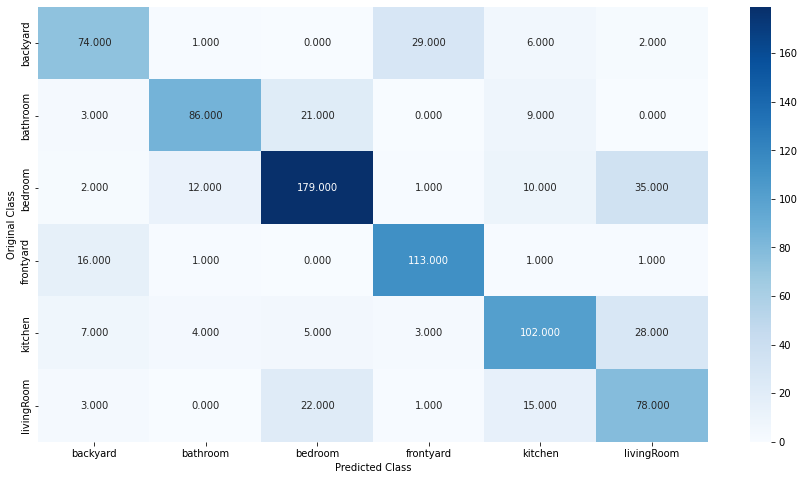

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, labels=list(ImageGenerator_test.class_indices.values()))

plt.figure(figsize=(15,8))

labels = list(ImageGenerator_test.class_indices.keys())

sns.heatmap(cm, annot=True, cmap='Blues', fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
precision = true_pos = np.diag(cm) /np.sum(cm,axis=0)
recall = true_pos = np.diag(cm) /np.sum(cm,axis=1)

In [ ]:
from prettytable import PrettyTable

columns = ["label", "Precision", "Recall"]

table = PrettyTable()

# Add Columns
table.add_column(columns[0], labels)
table.add_column(columns[1],list(map(lambda x : round(x,4),precision)))
table.add_column(columns[2], list(map(lambda x : round(x,4),recall)))

print(table)


+------------+-----------+--------+
|   label    | Precision | Recall |
+------------+-----------+--------+
|  backyard  |   0.7048  | 0.6607 |
|  bathroom  |   0.8269  | 0.7227 |
|  bedroom   |   0.7885  | 0.749  |
| frontyard  |   0.7687  | 0.8561 |
|  kitchen   |   0.7133  | 0.6846 |
| livingRoom |   0.5417  | 0.6555 |
+------------+-----------+--------+


#### Observation:
 
> epoch:1100

> Train accuracy: 76.08%

>Test accuracy: 74.94%


* stop training due to high training time.
* The precision and recall of bathroom  is 0.5417 and 0.655 respectively.


## RGB LSTM Model:

* The input to this  model is RGB image.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

### pre processing

In [ ]:
#!rm -r '/content/logs'

In [ ]:
!gdown --id 1s3JydD_s4sR_HOwyH7FhzKGqXlWrhpAs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1s3JydD_s4sR_HOwyH7FhzKGqXlWrhpAs
To: /content/Train_Test_Data.zip
100% 302M/302M [00:01<00:00, 216MB/s]


In [ ]:
!unzip '/content/Train_Test_Data.zip'

In [ ]:
test_data_path  = '/content/Train_Test_Data/REI-Dataset_test'
train_data_path = '/content/Train_Test_Data/REI-Dataset_train'

labels=[]

for (root,dirs,files) in os.walk(train_data_path, topdown=True):
  if(len(files)>0):
    
    labels.append(root[root.rfind('/')+1:])
labels

['frontyard', 'bathroom', 'bedroom', 'kitchen', 'backyard', 'livingRoom']

In [ ]:
from tqdm.notebook import tqdm_notebook

In [ ]:
for label in labels:

  path = train_data_path + '/' + label
  files = os.listdir(path)

  for file in tqdm_notebook(files):
    img_path = os.path.join(path, file)
    
    image = cv2.imread(img_path)

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    #enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    filename = os.path.join(path,'enh_'+file)
    
    cv2.imwrite(filename, enhanced_img)
    os.remove(img_path)

  0%|          | 0/752 [00:00<?, ?it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

  0%|          | 0/1354 [00:00<?, ?it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

  0%|          | 0/633 [00:00<?, ?it/s]

  0%|          | 0/724 [00:00<?, ?it/s]

In [ ]:
for label in labels:

  path = test_data_path + '/' + label
  files = os.listdir(path)

  for file in tqdm_notebook(files):
    img_path = os.path.join(path, file)
    
    image = cv2.imread(img_path)

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    #enhanced_grayscale_img = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)
    filename = os.path.join(path,'enh_'+file)
    
    cv2.imwrite(filename, enhanced_img)
    os.remove(img_path)

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

In [ ]:
!zip -r '/content/REI-Dataset_pp_enha_rgb_train_test.zip' '/content/Train_Test_Data'

### Modeling:

In [ ]:
class RGB_LSTM_network(tf.keras.Model):
    '''
    RGB_LSTM_network model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,lstm_units):
        super().__init__()

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.lstm_initial_h = 0
        self.lstm_initial_c = 0

        self.h_lstm_output = 0
        self.h_lstm_final_state_h = 0 
        self.h_lstm_final_state_c  = 0

        self.v_lstm_output = 0 
        self.v_lstm_final_state_h = 0
        self.v_lstm_final_state_c  = 0 

        self.lstm_units = lstm_units
                
        self.h_r_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="R_h_LSTM")
        self.h_b_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="B_h_LSTM")
        self.h_g_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="G_h_LSTM")

        self.v_r_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="R_v_LSTM")
        self.v_b_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="B_v_LSTM")
        self.v_g_lstm_layer = LSTM(self.lstm_units, return_sequences=False, return_state=True, name="G_v_LSTM")


    def call(self,input_sequence,initial_states):
        '''
          This function takes a RGB sequence input and the initial states of the LSTM.
                 
          returns RGB h lstm and v lstm total 6 outputs
        '''
        #print(' input shape : ',input_sequence.shape)
        #print(input_sequence[:,:,:,0].shape)

        Red_channel_input = input_sequence[:,:,:,0]

        Blue_channel_input = input_sequence[:,:,:,1]

        Green_channel_input = input_sequence[:,:,:,2]
        '''
        print(' Red_channel_input shape : ',Red_channel_input.shape)
        print(' Blue_channel_input shape : ',Blue_channel_input.shape)
        print(' Green_channel_input shape : ',Green_channel_input.shape)
       '''

        v_Red_channel_input   = tf.transpose( Red_channel_input, perm=[0, 2, 1], name='transpose')
        v_Blue_channel_input  = tf.transpose( Blue_channel_input, perm=[0, 2, 1], name='transpose')
        v_Green_channel_input = tf.transpose( Green_channel_input, perm=[0, 2, 1], name='transpose')
        '''
        print(' v_Red_channel_input shape : ',v_Red_channel_input.shape)
        print(' v_Blue_channel_input shape : ',v_Blue_channel_input.shape)
        print(' v_Green_channel_input shape : ',v_Green_channel_input.shape)
        print(' initial_states shape : ',initial_states[0].shape,initial_states[1].shape)
        '''

        self.lstm_initial_h = initial_states[0]
        self.lstm_initial_c = initial_states[1]
        
        self.h_R_lstm_output , self.h_R_lstm_final_state_h , self.h_R_lstm_final_state_c = self.h_r_lstm_layer(Red_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 
        
        self.h_B_lstm_output , self.h_B_lstm_final_state_h , self.h_B_lstm_final_state_c = self.h_b_lstm_layer(Blue_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 

        self.h_G_lstm_output , self.h_G_lstm_final_state_h , self.h_G_lstm_final_state_c = self.h_g_lstm_layer(Green_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 

        
        self.v_R_lstm_output , self.v_R_lstm_final_state_h , self.v_R_lstm_final_state_c = self.v_r_lstm_layer(v_Red_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 
        
        self.v_B_lstm_output , self.v_B_lstm_final_state_h , self.v_B_lstm_final_state_c = self.v_b_lstm_layer(v_Blue_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 

        self.v_G_lstm_output , self.v_G_lstm_final_state_h , self.v_G_lstm_final_state_c = self.v_g_lstm_layer(v_Green_channel_input,initial_state=(self.lstm_initial_h,self.lstm_initial_c)) 

        
        #print(' h_lstm_final_state_h output shape : ',self.h_lstm_final_state_h.shape)
        #print(' h_lstm_final_state_c output shape : ',self.h_lstm_final_state_c.shape)
        
        

        return self.h_R_lstm_output,self.h_B_lstm_output,self.h_G_lstm_output,self.v_R_lstm_output,self.v_B_lstm_output,self.v_G_lstm_output


    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''

      self.lstm_state_h = tf.zeros((batch_size,self.lstm_units))
      self.lstm_state_c = tf.zeros((batch_size,self.lstm_units))

      return self.lstm_state_h,self.lstm_state_c


    def get_config(self):
        return {'lstm_units': self.lstm_units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
def grader_RGB_LSTM_network():
    '''
        verifying theRGB_LSTM_network class

    '''

    input_row_length=128
    input_row_length=256
    channels=3
    lstm_units=32
    batch_size=64
    
    input_seq=tf.random.uniform(shape=(batch_size,input_row_length,input_row_length,channels),maxval=10,minval=0,dtype=tf.float32)


    state_h=tf.random.uniform(shape=[batch_size,lstm_units],dtype=tf.float32)
    state_c=tf.random.uniform(shape=[batch_size,lstm_units],dtype=tf.float32)
    states=[state_h,state_c]
    lstm= RGB_LSTM_network(lstm_units)
    states = lstm.initialize_states(batch_size)
    h_lstm,_,_,v_lstm,_,_=lstm(input_seq, states)
    print(h_lstm.shape)
    print(v_lstm.shape)
    assert(h_lstm.shape==(batch_size,lstm_units))
    return True
print(grader_RGB_LSTM_network())

In [ ]:
class main_RGB_framwork(tf.keras.Model):
    
    def __init__(self,lstm_units,output_class_cnt,batch_size):
        super().__init__()

        self.lstm_units         =     lstm_units   
        self.output_class_cnt   =     output_class_cnt     
        self.batch_size         =     batch_size
        


        self.lstm_network = RGB_LSTM_network(self.lstm_units)

        self.dense_layer_1 = Dense(256, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=12))
        #self.dense_layer_2 = Dense(128, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=45))
        self.dense_layer_3 = Dense(64, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal(seed=65))
        
        self.output_layer = Dense(self.output_class_cnt, activation='softmax')
        
    
    
    def call(self,input_data):
       
        '''
        print(input_data.shape)
        print(output_data.shape)
        '''

        initial_states =  self.lstm_network.initialize_states(batch_size = self.batch_size)
        h_r_lstm_output,h_b_lstm_output,h_g_lstm_output,v_r_lstm_output,v_b_lstm_output,v_g_lstm_output = self.lstm_network(input_data,initial_states)
        '''
        print(h_lstm_output.shape)
        print(v_lstm_output.shape)
        '''
        lstm_output = tf.concat([ h_r_lstm_output,h_b_lstm_output,h_g_lstm_output,v_r_lstm_output,v_b_lstm_output,v_g_lstm_output], 1)

        #print(lstm_output.shape)

        dense_1 = self.dense_layer_1(lstm_output)
        #dense_2 = self.dense_layer_2(dense_1)
        dense_3 = self.dense_layer_3(dense_1)
        dense_output = self.output_layer(dense_3)

        #print('dense output shape : ',dense_output.shape)

        return dense_output

    def get_config(self):
        return {'lstm_units'   : self.lstm_units    ,            
                'output_class_cnt'     : self.output_class_cnt ,
                'batch_size'    : self.batch_size
                }
               
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
train_data_path='/content/Train_Test_Data/REI-Dataset_train'
test_data_path='/content/Train_Test_Data/REI-Dataset_test'
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=15, width_shift_range=0.2,rescale=1./255, \
                                                            height_shift_range=0.2, horizontal_flip=True)

ImageGenerator_train = ImageFlow.flow_from_directory(train_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                     class_mode = 'categorical', color_mode = 'rgb' )


test_ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ImageGenerator_test = test_ImageFlow.flow_from_directory(test_data_path,target_size=(128,128),seed=10,batch_size=10,\
                                                         class_mode = 'categorical', color_mode = 'rgb')


Found 4980 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


### Fitting the model:

In [ ]:
lstm_units        = 64
output_class_cnt  = len(labels)
batch_size        = 10

model = main_RGB_framwork(lstm_units,output_class_cnt,batch_size)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_func= tf.keras.losses.CategoricalCrossentropy()#tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer,loss=loss_func,metrics=['accuracy'])

train_steps   =     4980//batch_size
valid_steps   =     879//batch_size

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.005)
  
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [lr_scheduler])

Epoch 1/100
498/498 [==============================] - 90s 113ms/step - loss: 1.6503 - accuracy: 0.3082 - val_loss: 1.5942 - val_accuracy: 0.3161 - lr: 0.0010
Epoch 2/100
498/498 [==============================] - 53s 107ms/step - loss: 1.4729 - accuracy: 0.3709 - val_loss: 1.3658 - val_accuracy: 0.4322 - lr: 0.0010
Epoch 3/100
498/498 [==============================] - 54s 109ms/step - loss: 1.3584 - accuracy: 0.4205 - val_loss: 1.4248 - val_accuracy: 0.3816 - lr: 0.0010
Epoch 4/100
498/498 [==============================] - 54s 108ms/step - loss: 1.2984 - accuracy: 0.4464 - val_loss: 1.2509 - val_accuracy: 0.4425 - lr: 0.0010
Epoch 5/100
498/498 [==============================] - 56s 113ms/step - loss: 1.2749 - accuracy: 0.4548 - val_loss: 1.1645 - val_accuracy: 0.4736 - lr: 0.0010
Epoch 6/100
498/498 [==============================] - 53s 107ms/step - loss: 1.2474 - accuracy: 0.4610 - val_loss: 1.2125 - val_accuracy: 0.4920 - lr: 0.0010
Epoch 7/100
498/498 [=========================

In [ ]:
model.save('/content/RGB_lstm_model',save_format='tf')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.fit(ImageGenerator_train, steps_per_epoch=train_steps, epochs=100,\
                    validation_data=ImageGenerator_test, validation_steps=valid_steps,callbacks = [lr_scheduler])

Epoch 1/100
498/498 [==============================] - 58s 116ms/step - loss: 0.7691 - accuracy: 0.6920 - val_loss: 0.7489 - val_accuracy: 0.6954 - lr: 6.3763e-04
Epoch 2/100
498/498 [==============================] - 56s 113ms/step - loss: 0.7740 - accuracy: 0.6789 - val_loss: 0.7499 - val_accuracy: 0.6816 - lr: 6.3763e-04
Epoch 3/100
498/498 [==============================] - 56s 113ms/step - loss: 0.7855 - accuracy: 0.6751 - val_loss: 0.7654 - val_accuracy: 0.6989 - lr: 6.3763e-04
Epoch 4/100
498/498 [==============================] - 56s 112ms/step - loss: 0.7740 - accuracy: 0.6841 - val_loss: 0.7324 - val_accuracy: 0.7103 - lr: 6.3763e-04
Epoch 5/100
498/498 [==============================] - 56s 112ms/step - loss: 0.7796 - accuracy: 0.6775 - val_loss: 0.7667 - val_accuracy: 0.6874 - lr: 6.3763e-04
Epoch 6/100
498/498 [==============================] - 57s 115ms/step - loss: 0.7962 - accuracy: 0.6725 - val_loss: 0.7370 - val_accuracy: 0.6885 - lr: 6.3763e-04
Epoch 7/100
498/498 [=

####Observation:

> epoch:194

>Train accuracy: 74.08%

>Test accuracy: 72.30%

#Observation:


In [1]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
Table = PrettyTable(["Sno", "epoch", "Model", "Train accuracy","Test Accuracy"])

# Add rows
Table.add_row(["1", "340", "simple baseline model", "78.83%","79.29%"])
Table.add_row(["2", "200", "Grayscale LSTM model M1", " 74.54%","70.11%"])
Table.add_row(["3", "1100", "Grayscale LSTM model M2", "76.08%","74.94%"])
Table.add_row(["4", "194", "RGB LSTM model", "74.08%","72.30%"])

print(Table)


+-----+-------+-------------------------+----------------+---------------+
| Sno | epoch |          Model          | Train accuracy | Test Accuracy |
+-----+-------+-------------------------+----------------+---------------+
|  1  |  340  |  simple baseline model  |     78.83%     |     79.29%    |
|  2  |  200  | Grayscale LSTM model M1 |     74.54%     |     70.11%    |
|  3  |  1100 | Grayscale LSTM model M2 |     76.08%     |     74.94%    |
|  4  |  194  |      RGB LSTM model     |     74.08%     |     72.30%    |
+-----+-------+-------------------------+----------------+---------------+


* Both Grayscale and RGB LSTM model need to be fine tuned and should be trained for more epoch which may surely results in better results.
* Simple Baseline model was performing good.
* Gray scale LSTM M2 model and Gray scale LSTM M1 are same in architecture, only differ in train data i.e.data augmentation.
* Since the training data is small, which is limiting the model to perform well.
